<a href="https://colab.research.google.com/github/J4sonN/Predition-of-Product-Sales/blob/main/Prediction_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Prediction of Product Sales**

- **Author:** *Quan Nguyen*

## Project Overview

> *The project will focus on developing a comprehensive sales prediction model specifically for food items that are sold at various stores. This predictive model will be designed to analyze and interpret a wide range of data, including sales history, customer preferences, product features, and store location data, among others. By harnessing the power of data analytics and machine learning techniques, the goal of this project is to provide the retailer with actionable insights into the properties of products and outlets that play crucial roles in driving sales.*

---
**Data Dictionary:**


---
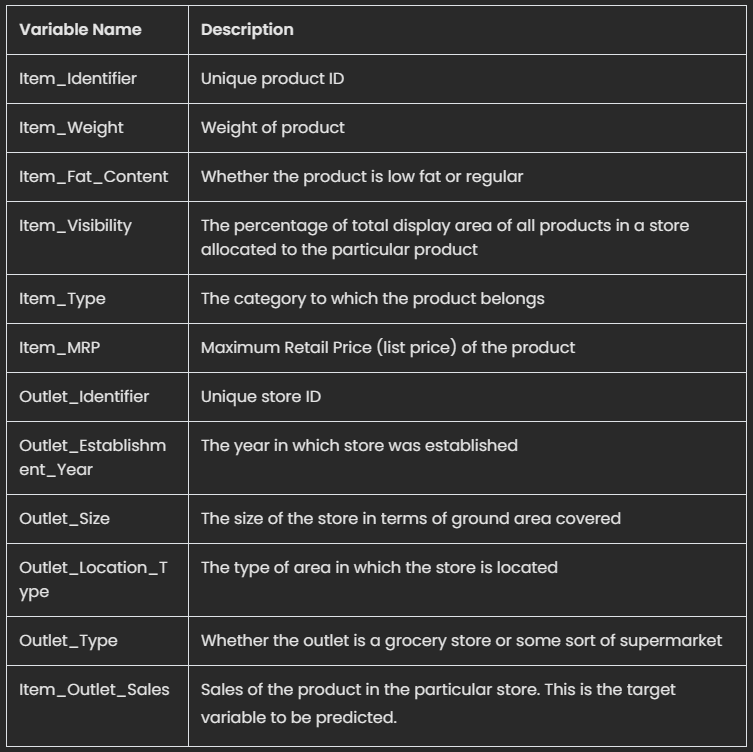





## **Import Libraries**

In [ ]:
## Pandas
import pandas as pd
## Numpy
import numpy as np
## Seaborn
import seaborn as sns
## Matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl

##Scikit Learn

###Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

###Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn import set_config
set_config(display='diagram')
## Filter ALL warnings
import warnings
warnings.filterwarnings('ignore')

from IPython.core.display import clear_output

## **Load and Inspect Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filename = '/content/drive/MyDrive/Projects/sales_predictions.csv'

In [ ]:
df = pd.read_csv(filename)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


> - Use Pandas to read the sales prediction data set into Google Colab.  
- Use df.info() and df.head() methods to preview the first rows of your data and a summary of your DataFrame's columns.

## **Data Cleaning**

###Check how many rows and columns the data has

In [ ]:
df.shape

(8523, 12)

In [ ]:
print(f"There is {df.shape[0]} rows, and {df.shape[1]} columns in the data")

There is 8523 rows, and 12 columns in the data


###Check datatypes of each variable

In [ ]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

###Check duplicates

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [ ]:
df.duplicated().sum()

0

In [ ]:
print(f"There are {df.duplicated().sum()} duplicated values in the dataset")

There are 0 duplicated values in the dataset


###Identify missing values

In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

- There are some NA values on Item Weight and Outlet Size.


- Imputing missing values for numerical column with its median.

In [ ]:
median_weight = df['Item_Weight'].median()
df['Item_Weight'].fillna(median_weight, inplace=True)
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

- For categorical like Outler_Size column, replacing Unknown with all missing values to not creating bias for the values of this column. 

In [ ]:
df['Outlet_Size'].fillna('Unknown', inplace=True)

In [ ]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
print(f"There is {df.isna().sum().sum()} missing values in the dataset")

There is 0 missing values in the dataset


### Check for Inconsitency categories of data 

In [ ]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [ ]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].astype(str)

In [ ]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')

In [ ]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

*Double checking on other suspected columns*

In [ ]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [ ]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

###Obtain the summary statistics of each.

In [ ]:
stats = df.describe().round(2)

In [ ]:
stats.loc[['mean','min','max']]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
mean,12.81,0.07,140.99,1997.83,2181.29
min,4.56,0.00,31.29,1985.00,33.29
max,21.35,0.33,266.89,2009.00,13086.96


##**Exploratory Data Analysis**

The exploratory data analysis of this dataset will include:  
  - Histogram to view the distributions of various features in your dataset.
  - Boxplot to view statistical summaries of various features in your dataset.
  - Heatmap of the correlation between features.

##**Numeric column**

In [ ]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


- For each numeric column, we will plot the histogram distribution and a boxplot

In [ ]:
df.describe(include ='number')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
num_col = df.select_dtypes('number').columns
num_col

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

###EDA Using Function For Numerical Columns

Column-by-Column EDA using a function

- mean is red line
- median is cyan line 

I will not visual 'Outlet_Establishment_Year' as this column only show the counts of particular year that outlets established.

In [ ]:
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [ ]:
def plot_numeric(df,col):
  ## make the figure and axes sharing the same x-axis
  fig, axes = plt.subplots(nrows = 2,figsize= (8,4), sharex = True)
  ## Use seaborn plot
  sns.histplot(data = df, x = col, ax = axes[0],kde=True, fill=True)
  mean_value = df[col].mean()
  #add vertical mean value line
  axes[0].axvline(mean_value,color='red', ls='-',);
  sns.boxplot(data = df, x =col, ax = axes[1],
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.2, .1, .2, .3)},
    medianprops={"color": "cyan"});
  ##set title for column
  axes[0].set_title(f'Histogram for {col}')
  axes[1].set_title(f'Boxplot for {col}')
  sns.set_theme(style="ticks", palette=None)
  ## fixing overlapping labels and showing
  plt.tight_layout()
  plt.show()

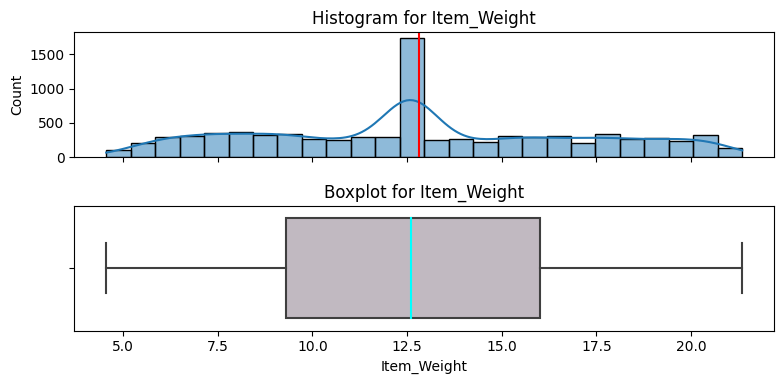

In [ ]:
plot_numeric(df, 'Item_Weight')

- We can see that median is around 12.5 for this column.
- The boxplot shows that there is no outliers

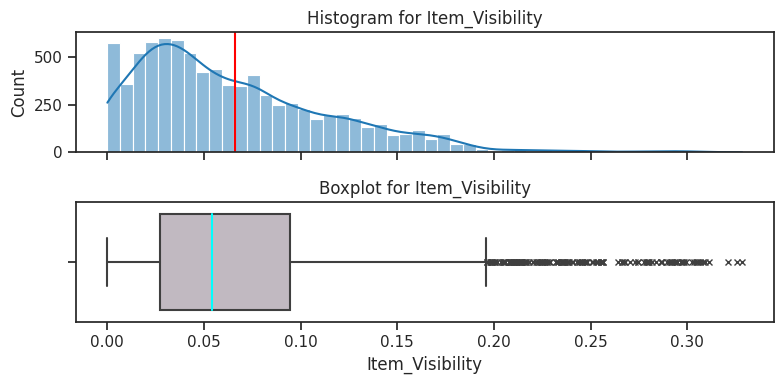

In [ ]:
plot_numeric(df,'Item_Visibility')

- We can see that the distribution of Item visibility is skewed to the right.
- Median is around 0.06
- A lot of outliers on the right side.

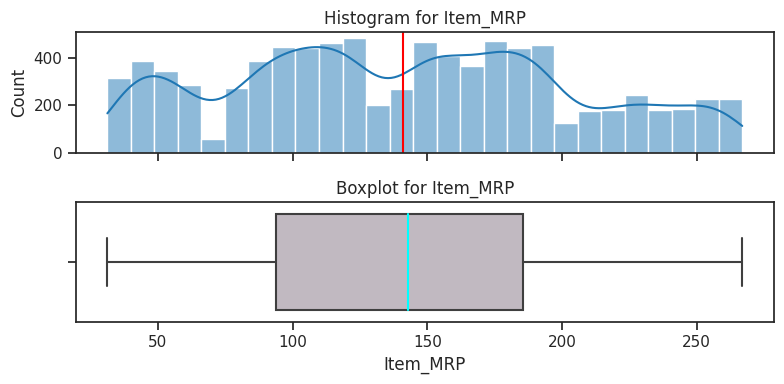

In [ ]:
plot_numeric (df,'Item_MRP')

- We can see that the price of items in dataset are well distributed along their range of MRP.
- Median and Mean are closed to each others ~ 140.

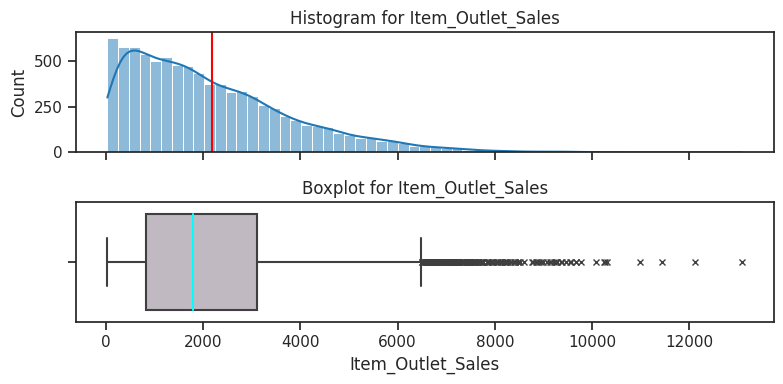

In [ ]:
plot_numeric(df,'Item_Outlet_Sales')

- With this skewed to the right this columns, we can see that the sale of outlets mostly lie around the Q1 percentile.
- Median is approximately at $1900

##**Categorical Columns**

###EDA Using Function For Categorical Columns

- Observe the categorical counts of all of the object type columns and visualize this information with a barplot

In [ ]:
categorical_col = df.select_dtypes('object').columns
categorical_col

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

EDA Function:

In [ ]:
def plot_bar(df, x):
  fig, ax= plt.subplots(figsize= (8,4))
  #counting up to the categories, sort the values of the column, change it to data frame
  counts = df[x].value_counts().sort_values(ascending=False).to_frame()
  sns.barplot(data = counts, x = counts.index, y = counts[x], ax = ax)
  plt.xticks(rotation = 90)
  ax.set_title(f'Categorical Frequencies of {str(x)}', fontsize = 15, fontweight = 'bold');
  ax.set_xlabel(f'Categories for {str(x)}')
  ax.set_ylabel('Counts')
  plt.show()
  return fig,ax


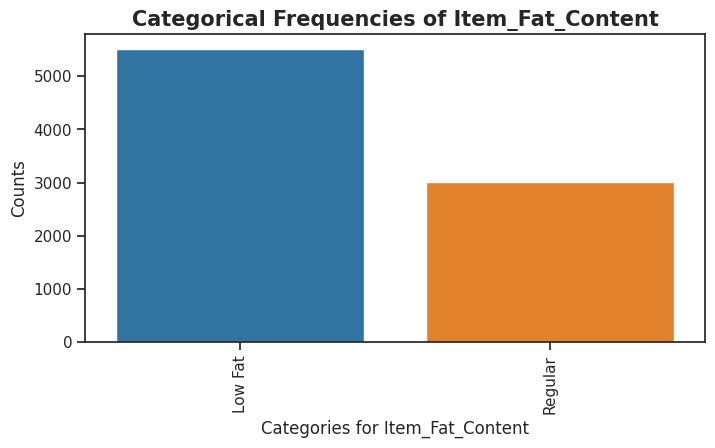

In [ ]:
fig, ax = plot_bar(df, 'Item_Fat_Content');

From the bar plot we can see that Low Fat Item are more popular in the products market.

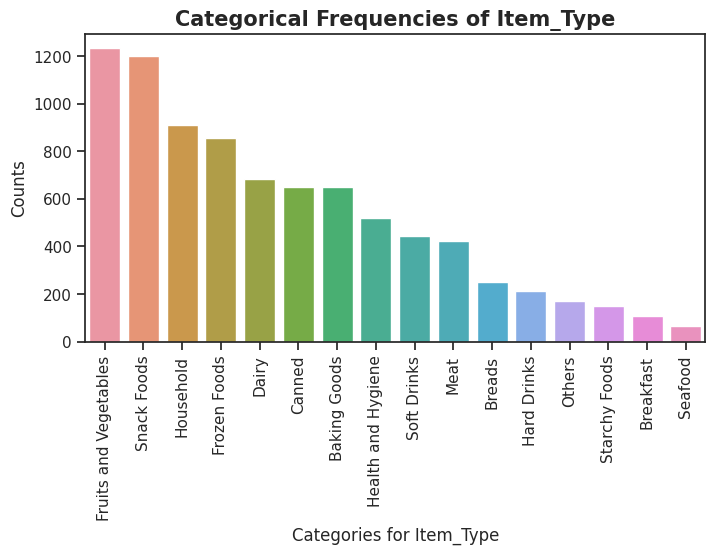

In [ ]:
fig, ax = plot_bar(df, 'Item_Type');

- We can see that all types of items are well distributed in the dataset.
- Fruits and Vegetables is the most popular in count.

### EDA for Correlated Features

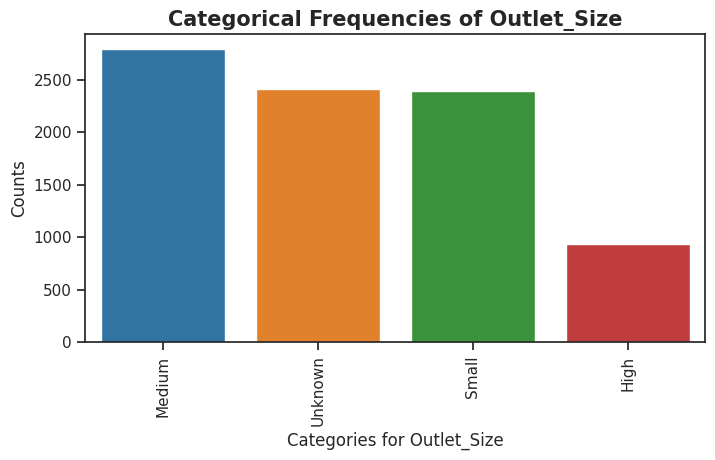

In [ ]:
fig, ax = plot_bar(df, 'Outlet_Size');

We can see that the Unknown outlet size are too much in this dataset so for this specific column we can't conclude anything about the dataset.

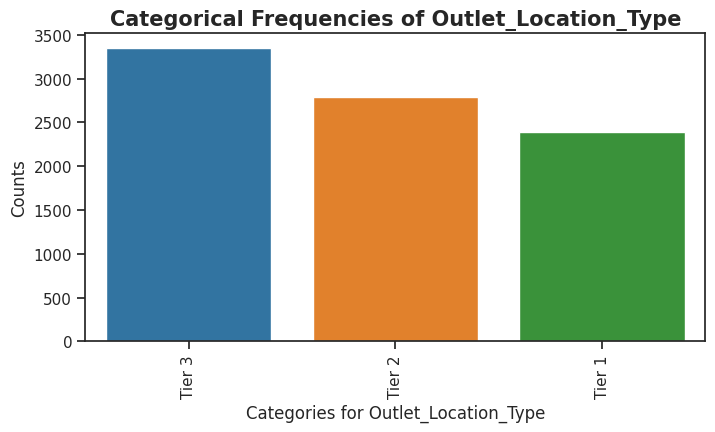

In [ ]:
fig, ax = plot_bar(df, 'Outlet_Location_Type');

- Tier 3 is the most frequent in count in the location type.

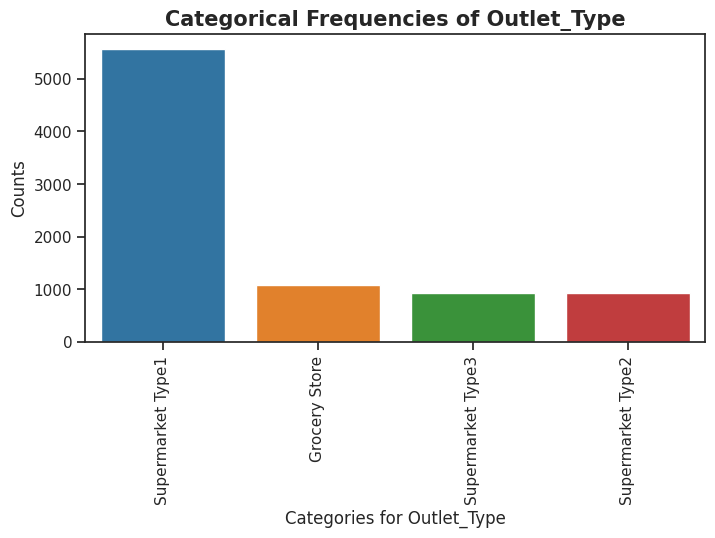

In [ ]:
fig, ax = plot_bar(df, 'Outlet_Type');

- With this dataset, supermarket type 1 is dominating the outlet type.

###EDA by using scatter plot function

> From the boxplot and histogram we can only see the relationship between Item MRP and Item Outlet size and between Item Visibility and Item Outlet size 


In [ ]:
def scatter_plot(df,col,row):
  fig, axes = plt.subplots(figsize= (8,4))
  sns.regplot(x = col, y = row, data = df, line_kws={'color':'red'},  color='cyan')
  axes.set_title(f'Scatter for {col} & {row}',fontsize = 20, fontweight = 'bold');
  plt.tight_layout()
  plt.show()


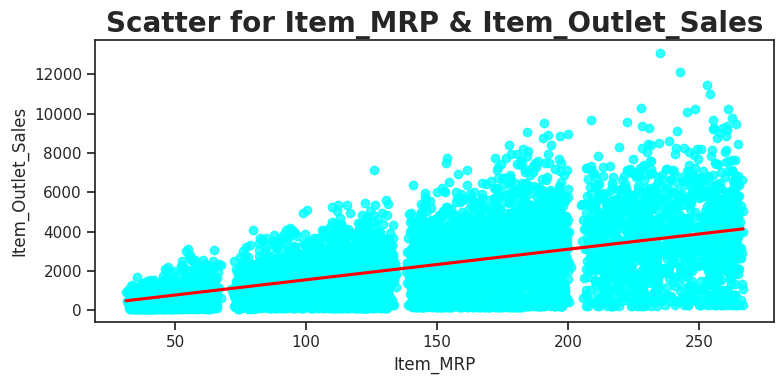

In [ ]:
scatter_plot(df,'Item_MRP', 'Item_Outlet_Sales')

This is a positive correlation.
The more expensive in MRP will incresing the sales of the outlet but not significant. 

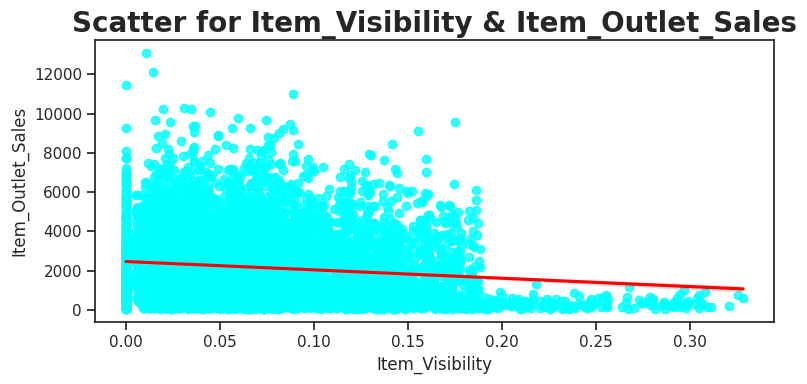

In [ ]:
scatter_plot(df,'Item_Visibility', 'Item_Outlet_Sales')

This is a negative correlation. The easier Item can be find will decrease the sales of the outlets

###Heatmap

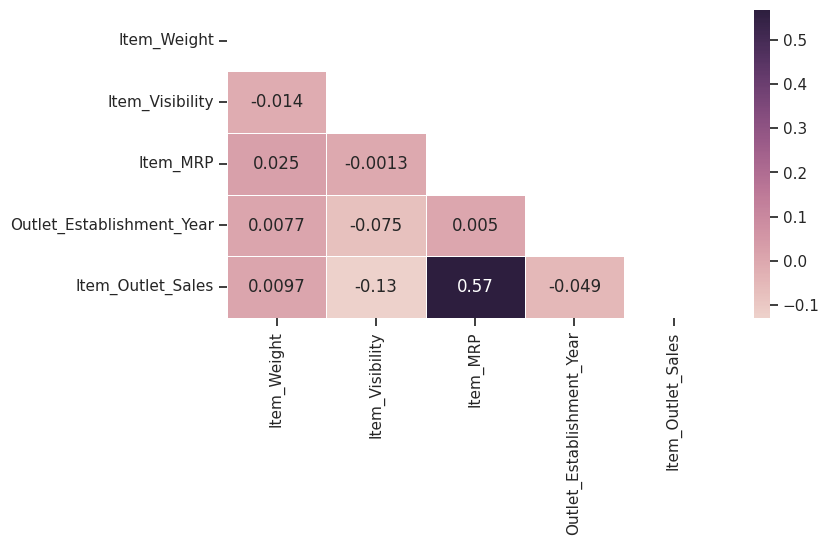

In [ ]:
# To get a triangle correlation map and hide duplicate values as well as the diagonal of all the values with themselves, use the mask argument
# We will first define the area to be masked (blocked)
# np.ones_like(corr) creates an array of all 1s of the same shape as the corr dataframe we just made
# np.triu() will just return the upper triangle of any array 
# by masking (blocking) the upper triangle in our heatmap, we are left with only the lower triangle
mask = np.triu(np.ones_like(df.corr()))
fig, ax = plt.subplots(figsize = (8, 4))
sns.heatmap(df.corr(), cmap=sns.cubehelix_palette(as_cmap=True), annot = True, mask = mask,linewidth=.7);

- There aren't really any strong or even moderate correlations shown here.
- The most significant correlation between Item_Outlet_Sales and Item_MRP
- The weakest correlated is between Item_Visibility and Item MRP. 

###Big pictures EDA:

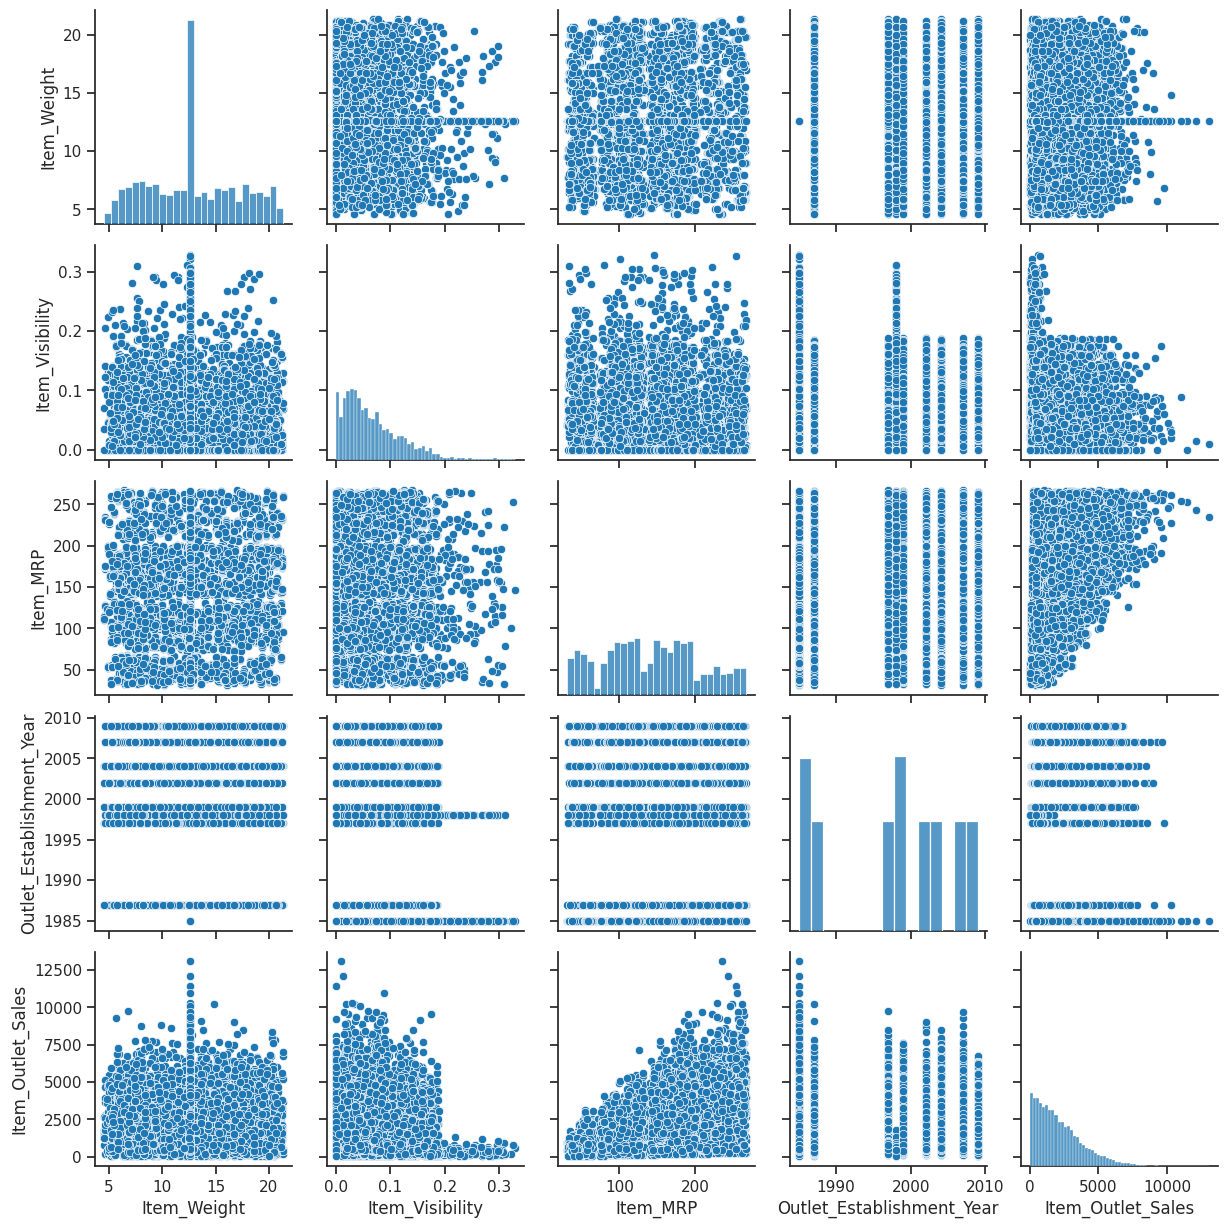

In [ ]:
sns.pairplot(df);

## Explanatory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


###**Possible Questions to Answer:**

1. What type of Items are easiest to find?
2. Stakeholder wants to invest in this market, what type of outlets should they invest in to max out their profit?

**1. What type of Items are easiest to find?**

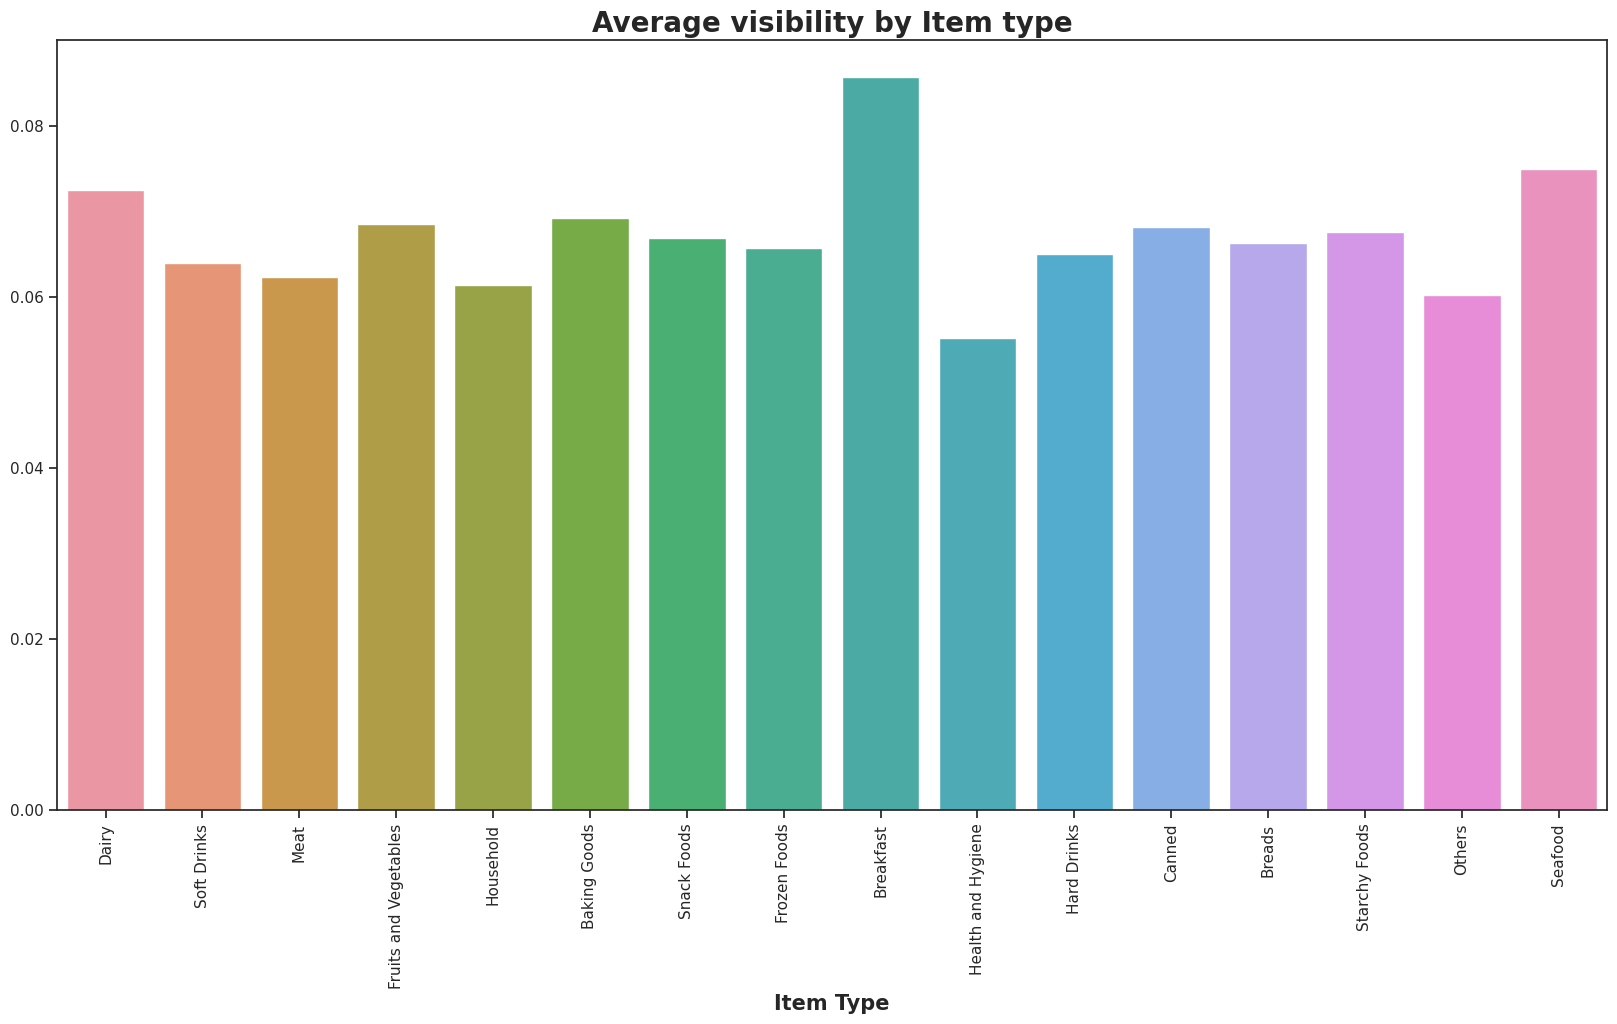

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))
ax = sns.barplot(data = df,x='Item_Type',y='Item_Visibility', ci= None)
plt.xticks(rotation = 90)
ax.set_title('Average visibility by Item type', fontsize =20, fontweight = 'bold')
ax.set_xlabel('Item Type',fontsize = 15, fontweight = 'bold')
ax.set(ylabel=None);

- Breakfast is the easiest item that can be found.
- Health and Hygiene items are the hardest items that can be found.

**2. Stakeholder wants to invest in this market, what type of outlets should they invest in to max out their profit?**

In [ ]:
means = df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False)
means

Outlet_Type
Supermarket Type3    3694.038558
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Grocery Store         339.828500
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
price_fmt = mpl.ticker.StrMethodFormatter('${x:,.0f}')

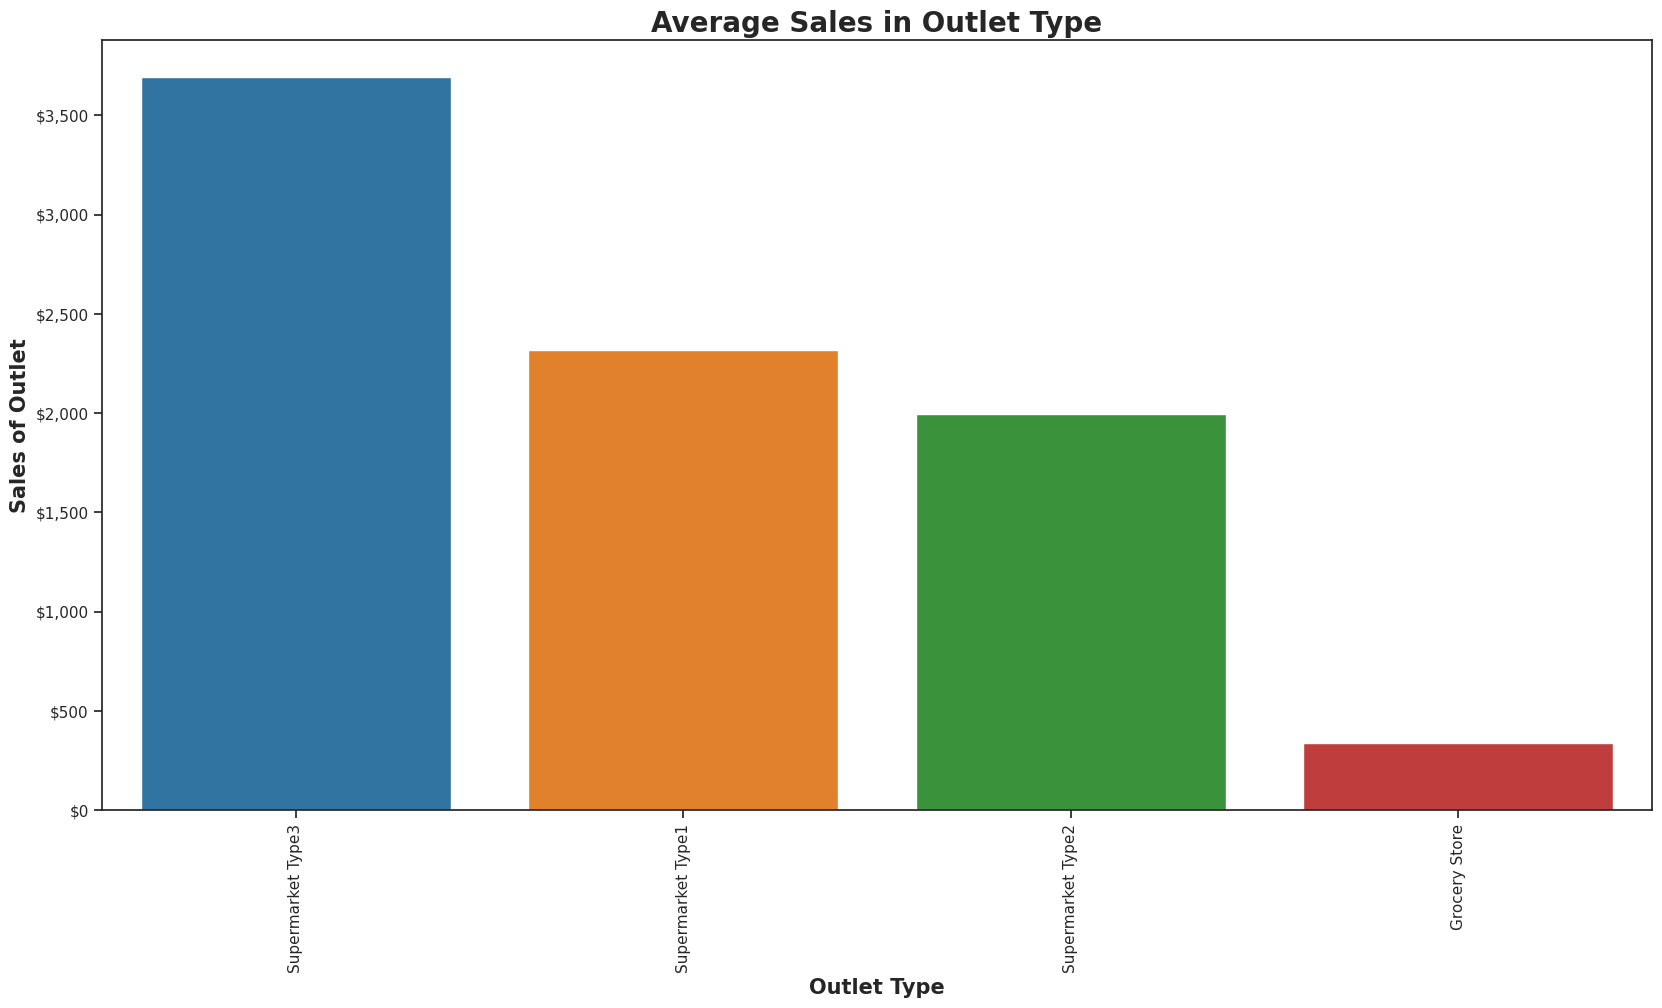

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))
ax = sns.barplot(data = df,x='Outlet_Type',y='Item_Outlet_Sales', order=means.index, ci= None)
plt.xticks(rotation = 90)
ax.set_title('Average Sales in Outlet Type', fontsize =20, fontweight = 'bold')
ax.set_xlabel('Outlet Type',fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Sales of Outlet',fontsize = 15, fontweight = 'bold')
ax.yaxis.set_major_formatter(price_fmt);

The graph does show that the supermarket type 3 outlets are the most profitable in average sales, stakeholders should be maximize their profits if they invest in this type of outlet.

##Preprocessing data to apply Machine Learning

###Reload fresh data

In [ ]:
df_ml = pd.read_csv(filename)

In [ ]:
df_ml.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
#drop uneccessary columns for applying machine learning.
df_ml.drop(columns=['Item_Identifier','Outlet_Identifier'], inplace = True)

In [ ]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                6113 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


###Cleaning data before proprocessing

*We will not handle missing value and imputation to avoid data leak*

In [ ]:
#fixing inconsistency of Item_Fat_Content columns

df_ml['Item_Fat_Content'] = df['Item_Fat_Content']

In [ ]:
df_ml.drop_duplicates()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
df_ml.duplicated().sum()

0

In [ ]:
df_ml.describe(include = 'number')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


###Checking missing value in target value

In [ ]:
Item_df = df_ml.copy()

In [ ]:
#check target data for null values
Item_df['Item_Outlet_Sales'].isna().sum()

0

There is no missing value on our target data

###Ordinal columns encoding

In [ ]:
#sorting data type to object and get their indexes
data_types = Item_df.dtypes
str_cols = data_types[data_types == 'object'].index
str_cols

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [ ]:
#display value list of all objects columns
for col in str_cols:
  print (f'- {col}:')
  print(Item_df[col].unique())
  print('\n\n')

- Item_Fat_Content:
['Low Fat' 'Regular']



- Item_Type:
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']



- Outlet_Size:
['Medium' nan 'High' 'Small']



- Outlet_Location_Type:
['Tier 1' 'Tier 3' 'Tier 2']



- Outlet_Type:
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']





> All the categorical columns except Item Fat Content are ordinal.

###Spliting Data (Validation Split)

In [ ]:
#split X and y, target are the Item outlet sales:

X = Item_df.drop(columns=['Item_Outlet_Sales']).copy()
y = Item_df['Item_Outlet_Sales'].copy()

#split training and test columns with random state 42 for reproducibility

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state=42)

###Creating Pipelines and Tuples for each group 

#### 1. Numeric

In [ ]:
# Transformers
mean_imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

# Pipeline
num_pipeline = make_pipeline(mean_imputer, scaler)

# Selector
num_selector = make_column_selector(dtype_include='number')

# Tuple
numeric_tuple = (num_pipeline, num_selector)

#### 2. Nominal

In [ ]:
# Transformers
missing_imputer = SimpleImputer(strategy='constant', fill_value='missing')
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Pipeline
nom_pipeline = make_pipeline(missing_imputer, ohe)

# Selector
nominal_cols = ['Item_Fat_Content', 'Item_Type']

# Tuple
nominal_tuple = (nom_pipeline, nominal_cols)

#### 4. Ordinal

In [ ]:
# Ordered Category Lists

Outlet_Size_list=['Small','Medium','High','Unknown']

Outlet_Location_Type_list = ['Tier 1','Tier 2','Tier 3']

Outlet_Type_list=['Supermarket Type1','Supermarket Type2','Supermarket Type3','Grocery Store']
# Transformers
ord = OrdinalEncoder(categories=[Outlet_Size_list,Outlet_Location_Type_list,Outlet_Type_list])
missing_imputer = SimpleImputer(strategy='constant', fill_value = 'Unknown')
scaler2 = StandardScaler()

# Pipeline
ord_pipeline = make_pipeline(missing_imputer, ord, scaler2)

# Selector
ordinal_cols = ['Outlet_Size','Outlet_Location_Type','Outlet_Type']

# Tuple
ordinal_tuple = (ord_pipeline, ordinal_cols)

###Create Column Transformer to apply preprocessing


In [ ]:
# Instantiate the make column transformer
preprocessor = make_column_transformer(numeric_tuple, 
                                       nominal_tuple, 
                                       ordinal_tuple,
                                       remainder='drop')

###Fit the Column Transformer on the Training Data

In [ ]:
# Fit the column transformer on the X_train
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f90fce8c400>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder...
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Unknown',
                                                                strategy='constant')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Small',
                                                                              'Medium',
                                                                              'High',
                                                                              'Unknown'],
                                                                             ['Tier '
                                                                              '1',
                                                                              'Tier '
                                                                              '2',
                                                                              'Tier '
                                                                              '3'],
                                                                             ['Supermarket '
                                                                              'Type1',
                                                                              'Supermarket '
                                                                              'Type2',
                                                                              'Supermarket '
                                                                              'Type3',
                                                                              'Grocery '
                                                                              'Store']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Outlet_Size', 'Outlet_Location_Type',
                                  'Outlet_Type'])])

###Transform Both Training and Testing data

In [ ]:
# Transform the X_train and the X_test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

###Display preprocessing dataframe

In [ ]:
# Create dataframes from the processed arrays
# First get column names
cols = preprocessor.get_feature_names_out()

# Then transform numpy arrays to dataframes
X_train_processed_df = pd.DataFrame(X_train_processed, 
                          columns = cols,
                          index = X_train.index)

X_test_processed_df = pd.DataFrame(X_test_processed, 
                         columns = cols,
                         index = X_test.index)

In [ ]:
X_train_processed_df.head()

,pipeline-1__Item_Weight,pipeline-1__Item_Visibility,pipeline-1__Item_MRP,pipeline-1__Outlet_Establishment_Year,pipeline-2__Item_Fat_Content_Low Fat,pipeline-2__Item_Fat_Content_Regular,pipeline-2__Item_Type_Baking Goods,pipeline-2__Item_Type_Breads,pipeline-2__Item_Type_Breakfast,pipeline-2__Item_Type_Canned,...,pipeline-2__Item_Type_Household,pipeline-2__Item_Type_Meat,pipeline-2__Item_Type_Others,pipeline-2__Item_Type_Seafood,pipeline-2__Item_Type_Snack Foods,pipeline-2__Item_Type_Soft Drinks,pipeline-2__Item_Type_Starchy Foods,pipeline-3__Outlet_Size,pipeline-3__Outlet_Location_Type,pipeline-3__Outlet_Type
1921,-1.237957,1.606681,-0.401895,0.015833,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.373204,1.083627,2.110465
655,1.616571,-1.008442,-0.619284,-0.103437,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.194989,-1.383428,-0.652949
2229,0.000000,-0.227068,-0.202535,-1.534680,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.338925,1.083627,1.189327
2537,1.521657,1.028038,1.290187,0.492914,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.373204,-0.149901,-0.652949
3528,1.284373,0.515355,0.686853,-1.296139,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.517140,1.083627,-0.652949


##**Regression Model Evaluation**

###Function for model evaluation

In [ ]:
def model_metrics (pipe, X_train, y_train, X_test, y_test, model_name = 'Regression model'):
  ##prediction:
  train_pred = pipe.predict(X_train)
  test_pred = pipe.predict(X_test)
  metrics = ['train_RMSE', 'test_RMSE',
             'train_R2', 'test_R2']
  ## Train metrics:
  train_rmse = round(np.sqrt(mean_squared_error(y_train, train_pred)),4)
  train_r2 = round(r2_score(y_train, train_pred), 4)

  ## Test metric:
  test_rmse = round(np.sqrt(mean_squared_error(y_test, test_pred)),4)
  test_r2 = round(r2_score(y_test, test_pred),4)

  #create data frame to store all metrics
  score = pd.DataFrame(columns = metrics, index = [f'{model_name}'])
  score.loc[f'{model_name}',:] = [train_rmse, test_rmse,
                                train_r2,test_r2]
  return score

###Linear Regression Model

####Build a linear regression model

In [ ]:
Reg = LinearRegression()
Reg_pipe = make_pipeline(preprocessor, Reg)

In [ ]:
Reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f90fce8c400>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='const...
                                                                                 strategy='constant')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'High',
                                                                                               'Unknown'],
                                                                                              ['Tier '
                                                                                               '1',
                                                                                               'Tier '
                                                                                               '2',
                                                                                               'Tier '
                                                                                               '3'],
                                                                                              ['Supermarket '
                                                                                               'Type1',
                                                                                               'Supermarket '
                                                                                               'Type2',
                                                                                               'Supermarket '
                                                                                               'Type3',
                                                                                               'Grocery '
                                                                                               'Store']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Outlet_Size',
                                                   'Outlet_Location_Type',
                                                   'Outlet_Type'])])),
                ('linearregression', LinearRegression())])

####Evaluation for linear regression model

In [ ]:
Linear_score = model_metrics(Reg_pipe, X_train, y_train, X_test, y_test, model_name='Linear regression')
display(Linear_score)

,train_RMSE,test_RMSE,train_R2,test_R2
Linear regression,1292.2125,1270.3819,0.4354,0.4238


####Tune up linear regression model with L1 penalty

In [ ]:
lasso = Lasso()

lasso_pipe = make_pipeline(preprocessor, lasso)

lasso_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f90fce8c400>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='const...
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'High',
                                                                                               'Unknown'],
                                                                                              ['Tier '
                                                                                               '1',
                                                                                               'Tier '
                                                                                               '2',
                                                                                               'Tier '
                                                                                               '3'],
                                                                                              ['Supermarket '
                                                                                               'Type1',
                                                                                               'Supermarket '
                                                                                               'Type2',
                                                                                               'Supermarket '
                                                                                               'Type3',
                                                                                               'Grocery '
                                                                                               'Store']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Outlet_Size',
                                                   'Outlet_Location_Type',
                                                   'Outlet_Type'])])),
                ('lasso', Lasso())])

In [ ]:
## Display model performance metrics using a function
lasso_scores = model_metrics(lasso_pipe, X_train, y_train, 
                          X_test, y_test, 
                           model_name='Lasso Model')

scores_df = pd.concat([Linear_score, lasso_scores])
display(scores_df)

,train_RMSE,test_RMSE,train_R2,test_R2
Linear regression,1292.2125,1270.3819,0.4354,0.4238
Lasso Model,1292.3841,1269.0975,0.4352,0.425


In [ ]:
lasso.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [ ]:
## Create a range of alpha values
alphas = [.0001, .001, .01, .1, 1, 10, 100, 1000]
## Create a dataframe to store Train and Test R2 scores
scores = pd.DataFrame(index=alphas, columns=['Train R2', 'Test R2'])
## Loop through the alpha values
for alpha in alphas:
   clear_output(wait=True)
   print(f'testing alpha of {alpha} of {alphas}')
   ## Create an instance of the model
   lasso = Lasso(alpha=alpha)
   ## Create a model pipeline
   lasso_pipe = make_pipeline(preprocessor, lasso)
   ## Fit the model
   lasso_pipe.fit(X_train, y_train)

   ## Obtain the predictions from the model
   train_pred = lasso_pipe.predict(X_train)
   test_pred = lasso_pipe.predict(X_test)

   ## Obtain the R2 scores for Train and Test
   train_r2score = r2_score(y_train, train_pred)
   test_r2score = r2_score(y_test, test_pred)

   ## Save the Train and Test R2 Score for this depth in the scores dataframe
   scores.loc[alpha, 'Train R2'] = train_r2score
   scores.loc[alpha, 'Test R2'] = test_r2score

testing alpha of 1000 of [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]


In [ ]:
scores = scores.sort_values(by='Test R2', ascending = False)
scores.head()

,Train R2,Test R2
10.000,0.433821,0.427051
1.000,0.435235,0.424987
0.100,0.435383,0.423951
0.010,0.435385,0.423835
0.001,0.435385,0.423824


In [ ]:
best_alpha = scores.index[0]
best_lasso = Lasso(alpha=best_alpha, random_state=42)
best_lasso_pipe = make_pipeline(preprocessor, best_lasso)
best_lasso_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f90fce8c400>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='const...
                                                                                 strategy='constant')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'High',
                                                                                               'Unknown'],
                                                                                              ['Tier '
                                                                                               '1',
                                                                                               'Tier '
                                                                                               '2',
                                                                                               'Tier '
                                                                                               '3'],
                                                                                              ['Supermarket '
                                                                                               'Type1',
                                                                                               'Supermarket '
                                                                                               'Type2',
                                                                                               'Supermarket '
                                                                                               'Type3',
                                                                                               'Grocery '
                                                                                               'Store']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Outlet_Size',
                                                   'Outlet_Location_Type',
                                                   'Outlet_Type'])])),
                ('lasso', Lasso(alpha=10.0, random_state=42))])

In [ ]:
best_lasso_scores = model_metrics(best_lasso_pipe, X_train, y_train, 
                          X_test, y_test, 
                           model_name='Best Lasso Model')

scores_df = pd.concat([scores_df, best_lasso_scores])
display(scores_df)

,train_RMSE,test_RMSE,train_R2,test_R2
Linear regression,1292.2125,1270.3819,0.4354,0.4238
Lasso Model,1292.3841,1269.0975,0.4352,0.425
Best Lasso Model,1294.0011,1266.8176,0.4338,0.4271


***Tuned Linear Regression Model Observations***

- This model perform poorly on both training and testing set due to low R2 score
- This data mostlikely not suitable for Linear Model


###Tree regression model

####Build a Random Forrest regression

In [ ]:
rf = RandomForestRegressor()
rf_pipe =make_pipeline(preprocessor, rf)
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f90fce8c400>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='const...
                                                                                 strategy='constant')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'High',
                                                                                               'Unknown'],
                                                                                              ['Tier '
                                                                                               '1',
                                                                                               'Tier '
                                                                                               '2',
                                                                                               'Tier '
                                                                                               '3'],
                                                                                              ['Supermarket '
                                                                                               'Type1',
                                                                                               'Supermarket '
                                                                                               'Type2',
                                                                                               'Supermarket '
                                                                                               'Type3',
                                                                                               'Grocery '
                                                                                               'Store']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Outlet_Size',
                                                   'Outlet_Location_Type',
                                                   'Outlet_Type'])])),
                ('randomforestregressor', RandomForestRegressor())])

####Evaluation for Random Forrest Regression model

In [ ]:
rf_score = model_metrics(rf_pipe, X_train, y_train, X_test, y_test,
                         model_name='Random Forrest Model')
scores_df = pd.concat([scores_df, rf_score])
display(scores_df)

,train_RMSE,test_RMSE,train_R2,test_R2
Linear regression,1292.2125,1270.3819,0.4354,0.4238
Lasso Model,1292.3841,1269.0975,0.4352,0.425
Best Lasso Model,1294.0011,1266.8176,0.4338,0.4271
Random Forrest Model,429.5079,1120.9024,0.9376,0.5514


***Untuned Random Forrest Model Observations***

- this model performs really well on train data set, however on test data set it is not that well in test data
- therefore, it create a Bias-Variance trade-off which is high variance and low bias - this lead to an overfitting model.
- Hence, we need to tuned up the model

In [ ]:
#estimate depths of random forrest regression
est_depths = [e.get_depth() for e in rf.estimators_]
max(est_depths)

41

####Tune up random forrest regression model with optimal depth

In [ ]:
depths = range (1,max(est_depths))
scores_rf = pd.DataFrame(index = depths, columns=['Test Score','Train Score'])
for d in depths:
  rf_model = RandomForestRegressor(max_depth=d)
  rf_model_pipe = make_pipeline(preprocessor, rf_model)
  rf_model_pipe.fit(X_train,y_train)
   ## Obtain the predictions from the model
  train_pred = rf_model_pipe.predict(X_train)
  test_pred = rf_model_pipe.predict(X_test)

  ## Obtain the R2 scores for Train and Test
  train_r2score = r2_score(y_train, train_pred)
  test_r2score = r2_score(y_test, test_pred)

  scores_rf.loc[d, 'Train Score'] = train_r2score
  scores_rf.loc[d, 'Test Score'] = test_r2score

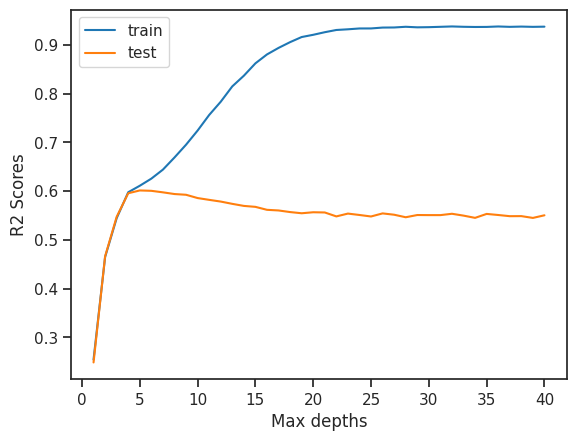

In [ ]:
#plot the scores to visually determine the best max_depth
plt.plot(depths, scores_rf['Train Score'], label = 'train')
plt.plot(depths, scores_rf['Test Score'], label = 'test')
plt.ylabel('R2 Scores')
plt.xlabel('Max depths')
plt.legend()
plt.show();

In [ ]:
scores_rf = scores_rf.sort_values(by='Test Score', ascending=False)
scores_rf.head()

,Test Score,Train Score
5,0.601294,0.610942
6,0.600524,0.625553
7,0.597419,0.644026
4,0.595532,0.597629
8,0.593929,0.668905


#### With optimal depth, tune up again with best number of estimators

In [ ]:
n_est = np.arange(50,250,50)
scores_rf_2 = pd.DataFrame(index=n_est,columns=['Test Score','Train Score'])
for n in n_est:
  model_2 = RandomForestRegressor(max_depth=5, n_estimators=n)
  model_2_pipe = make_pipeline(preprocessor,model_2)
  model_2_pipe.fit(X_train, y_train)
  ## Obtain the predictions from the model
  train_pred = model_2_pipe.predict(X_train)
  test_pred = model_2_pipe.predict(X_test)

  ## Obtain the R2 scores for Train and Test
  train_r2score = r2_score(y_train, train_pred)
  test_r2score = r2_score(y_test, test_pred)

  scores_rf_2.loc[n, 'Train Score'] = train_r2score
  scores_rf_2.loc[n, 'Test Score'] = test_r2score

In [ ]:
scores_rf_2 = scores_rf_2.sort_values(by='Test Score', ascending =False)
scores_rf_2.head()

,Test Score,Train Score
200,0.602133,0.611139
150,0.601849,0.611129
100,0.601807,0.610455
50,0.600529,0.610698


In [ ]:
best_n = scores_rf_2.index[0]
rf_tuned = RandomForestRegressor(max_depth=5,n_estimators=best_n)
rf_tuned_pipe = make_pipeline(preprocessor, rf_tuned)
rf_tuned_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f90fce8c400>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='const...
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'High',
                                                                                               'Unknown'],
                                                                                              ['Tier '
                                                                                               '1',
                                                                                               'Tier '
                                                                                               '2',
                                                                                               'Tier '
                                                                                               '3'],
                                                                                              ['Supermarket '
                                                                                               'Type1',
                                                                                               'Supermarket '
                                                                                               'Type2',
                                                                                               'Supermarket '
                                                                                               'Type3',
                                                                                               'Grocery '
                                                                                               'Store']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Outlet_Size',
                                                   'Outlet_Location_Type',
                                                   'Outlet_Type'])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=5, n_estimators=200))])

In [ ]:
rf_tuned_scores = model_metrics(rf_tuned_pipe, X_train, y_train, 
                                X_test, y_test, 
                                model_name='Tuned Random Forrest Model')
scores_df = pd.concat([scores_df, rf_tuned_scores])
display(scores_df)

,train_RMSE,test_RMSE,train_R2,test_R2
Linear regression,1292.2125,1270.3819,0.4354,0.4238
Lasso Model,1292.3841,1269.0975,0.4352,0.425
Best Lasso Model,1294.0011,1266.8176,0.4338,0.4271
Random Forrest Model,429.5079,1120.9024,0.9376,0.5514
Tuned Random Forrest Model,1072.4855,1056.2015,0.6111,0.6017


***Tuned Random Forrest Model Observations***

- This data perform well after tuned the random forrest model
- This creates relatively low RMSE on both train and test dataset about $1060.
- R2 score 60% of the variance, also shows some bias in this model.
- Overall we see the best results as far as the regression metrics and the model's performance.
- Therefore, we would choose this model to recommend for the stakeholders

#Overall Recommendations

Market Products insights  

- For new stakeholders want to invest in this market:
    - Breakfast are the easiest item to find among the outlets, therefore if we want to max out products sale, we should invest majority of funds for this item types.
    - Besides, Supermarket type 3 has a domination in sales among outlet size. If providers want to participate in this market, they should consider this type of market to coordinate. 

Model Performance  

 - Overall, we can see that Tuned Random Forrest Regressor are the most efficient for this data in terms of its regression metrics.  